# Contaminación Sonora Provocada por Automóviles en la Ciudad de Nueva York

## Introducción

La contaminación sonora es un problema creciente en las áreas urbanas de todo el mundo, y la Ciudad de Nueva York no es una excepción. En una metrópoli tan vibrante y concurrida, los niveles de ruido pueden alcanzar niveles preocupantes debido a diversas fuentes, siendo los automóviles una de las principales causas. La densidad de tráfico, los sistemas de escape ruidosos, las bocinas y las alarmas de los vehículos contribuyen significativamente a la contaminación sonora, afectando la calidad de vida de los residentes y la salud pública en general.

La contaminación sonora en Nueva York ha sido objeto de estudio debido a sus impactos en la salud, el bienestar y el confort de los ciudadanos. La exposición prolongada a altos niveles de ruido puede causar problemas como estrés, pérdida auditiva y trastornos del sueño. Por ello, comprender la distribución y la intensidad de la contaminación sonora es crucial para desarrollar estrategias efectivas para mitigar estos efectos.

## Explicación de las Variables

A continuación, se proporciona una breve descripción de las variables utilizadas en el análisis de la contaminación sonora:

- **`borough`**: 
  - **Descripción**: Borough (Distrito en inglés) de la Ciudad de Nueva York donde se realizó la medición. Los distritos incluyen Manhattan, Brooklyn, Queens, The Bronx y Staten Island.

- **`block`**: 
  - **Descripción**: Número de bloque en el que se encuentra el sensor o punto de medición.

- **`latitude`**: 
  - **Descripción**: Latitud de la ubicación del sensor. Indica la posición norte-sur.

- **`longitude`**: 
  - **Descripción**: Longitud de la ubicación del sensor. Indica la posición este-oeste.

- **`year`**: 
  - **Descripción**: Año en el que se realizó la medición de ruido.

- **`week`**: 
  - **Descripción**: Número de la semana del año en la que se realizó la medición.

- **`day`**: 
  - **Descripción**: Día del mes en el que se realizó la medición.

- **`hour`**: 
  - **Descripción**: Hora del día en la que se realizó la medición.

- **`small-sounding-engine_presence`**: 
  - **Descripción**: Presencia de un motor de sonido pequeño. `1` si está presente, `0` si no está presente.

- **`medium-sounding-engine_presence`**: 
  - **Descripción**: Presencia de un motor de sonido medio. `1` si está presente, `0` si no está presente.

- **`large-sounding-engine_presence`**: 
  - **Descripción**: Presencia de un motor de sonido grande. `1` si está presente, `0` si no está presente.

- **`engine-of-uncertain-size_presence`**: 
  - **Descripción**: Presencia de un motor de tamaño incierto. `1` si está presente, `0` si no está presente.

- **`car-horn_presence`**: 
  - **Descripción**: Presencia de una bocina de automóvil. `1` si está presente, `0` si no está presente.

- **`car-alarm_presence`**: 
  - **Descripción**: Presencia de una alarma de automóvil. `1` si está presente, `0` si no está presente.



## Estructuras Generales de las Variables

El dataset original utiliza las siguientes estructuras para etiquetar la presencia y proximidad de eventos sonoros:

- **`<coarse_id>-<fine_id>_<fine_name>_presence`**: 
  - Indica la presencia de una clase de nivel fino. `1` si está presente, `0` si no está presente. Si es `-1`, la clase no se etiquetó en esta anotación porque la anotación la realizó un miembro del equipo de SONYC que solo anotó un grupo aproximado de clases a la vez.

- **`<coarse_id>_<coarse_name>_presence`**: 
  - Indica la presencia de una clase de nivel bajo. `1` si está presente, `0` si no está presente. Si es `-1`, la clase no se etiquetó en esta anotación por razones similares a las mencionadas anteriormente.




In [42]:
!pip install pandas pyarrow

^C
Note: you may need to restart the kernel to use updated packages.


Descarga del dataset  original

In [45]:
import pandas as pd

# Define el path del archivo CSV
file_path = '../../Datasets/annotations.csv'

# Lee el archivo CSV
df = pd.read_csv(file_path)

# Muestra las primeras filas del DataFrame
print(df.head())


  split  sensor_id audio_filename  annotator_id  borough  block  latitude  \
0  test          0  00_026884.wav            -6        1    547  40.72951   
1  test          0  00_026884.wav            -4        1    547  40.72951   
2  test          0  00_026884.wav            -3        1    547  40.72951   
3  test          0  00_026884.wav            -1        1    547  40.72951   
4  test          0  00_026884.wav             0        1    547  40.72951   

   longitude  year  week  ...  7-X_other-unknown-human-voice_proximity  \
0  -73.99388  2019    43  ...                                       -1   
1  -73.99388  2019    43  ...                                       -1   
2  -73.99388  2019    43  ...                                       -1   
3  -73.99388  2019    43  ...                                       -1   
4  -73.99388  2019    43  ...                                       -1   

   8-1_dog-barking-whining_proximity  1_engine_presence  \
0                                

Selección de las variables (columnas) a utilizar

In [46]:
# Lista con las columnas que deseas seleccionar
columnas_seleccionadas = [
    'borough',
    'block', 
    'latitude',
    'longitude',
    'year',
    'week',
    'day',
    'hour',
    '1-1_small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence',
    '5-1_car-horn_presence',
    '5-2_car-alarm_presence'
]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_nuevo = df[columnas_seleccionadas]

# Mostrar las primeras filas del nuevo DataFrame
print(df_nuevo.head())


   borough  block  latitude  longitude  year  week  day  hour  \
0        1    547  40.72951  -73.99388  2019    43    4     8   
1        1    547  40.72951  -73.99388  2019    43    4     8   
2        1    547  40.72951  -73.99388  2019    43    4     8   
3        1    547  40.72951  -73.99388  2019    43    4     8   
4        1    547  40.72951  -73.99388  2019    43    4     8   

   1-1_small-sounding-engine_presence  1-2_medium-sounding-engine_presence  \
0                                  -1                                   -1   
1                                   0                                    0   
2                                   0                                    1   
3                                  -1                                   -1   
4                                   0                                    1   

   1-3_large-sounding-engine_presence  1-X_engine-of-uncertain-size_presence  \
0                                  -1                       

Renombramiento del nombre de columnas


In [47]:

# Crear un diccionario de mapeo de nombres antiguos a nuevos
column_mapping = {
    '1-1_small-sounding-engine_presence': 'small-sounding-engine_presence',
    '1-2_medium-sounding-engine_presence': 'medium-sounding-engine_presence',
    '1-3_large-sounding-engine_presence': 'large-sounding-engine_presence',
    '1-X_engine-of-uncertain-size_presence': 'engine-of-uncertain-size_presence',
    '5-1_car-horn_presence': 'car-horn_presence',
    '5-2_car-alarm_presence': 'car-alarm_presence'
}

# Renombrar las columnas usando el diccionario de mapeo
df_nuevo.rename(columns=column_mapping, inplace=True)

print(df_nuevo.columns)


Index(['borough', 'block', 'latitude', 'longitude', 'year', 'week', 'day',
       'hour', 'small-sounding-engine_presence',
       'medium-sounding-engine_presence', 'large-sounding-engine_presence',
       'engine-of-uncertain-size_presence', 'car-horn_presence',
       'car-alarm_presence'],
      dtype='object')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\4083036281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo.rename(columns=column_mapping, inplace=True)


In [48]:
from datetime import datetime

def make_date_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    # Crear la columna de fecha a partir de year, week y day
    df['date'] = pd.to_datetime(df['year'].astype(str) + df['week'].astype(str) + df['day'].astype(str), format='%Y%W%w')
    
    # Ajustar la fecha a la hora del día
    df[col_name] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d') + ' ' + df['hour'].astype(str) + ':00:00')
    
    # Eliminar la columna temporal 'date'
    df.drop(columns=['date'], inplace=True)
    
    return df

Creación de la columna fecha

In [49]:
## Aplicar la función para crear la columna 'Date' en el DataFrame df_nuevo
df_nuevo = make_date_col(df_nuevo, 'Date')

# Mostrar las primeras filas del DataFrame para verificar la nueva columna 'Date'
print(df_nuevo[['year', 'week', 'day', 'hour', 'Date']])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\815611711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['year'].astype(str) + df['week'].astype(str) + df['day'].astype(str), format='%Y%W%w')


       year  week  day  hour                Date
0      2019    43    4     8 2019-10-31 08:00:00
1      2019    43    4     8 2019-10-31 08:00:00
2      2019    43    4     8 2019-10-31 08:00:00
3      2019    43    4     8 2019-10-31 08:00:00
4      2019    43    4     8 2019-10-31 08:00:00
...     ...   ...  ...   ...                 ...
62017  2018    42    5    19 2018-10-19 19:00:00
62018  2018    42    5    19 2018-10-19 19:00:00
62019  2018    34    2     9 2018-08-21 09:00:00
62020  2018    34    2     9 2018-08-21 09:00:00
62021  2018    34    2     9 2018-08-21 09:00:00

[62022 rows x 5 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\815611711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d') + ' ' + df['hour'].astype(str) + ':00:00')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\815611711.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['date'], inplace=True)


 Reemplazo de los valores -1 por 1

In [51]:
# Lista de columnas a modificar
columns_to_modify = [
    'small-sounding-engine_presence',
    'medium-sounding-engine_presence',
    'large-sounding-engine_presence',
    'engine-of-uncertain-size_presence',
    'car-horn_presence',
    'car-alarm_presence'
]

# Reemplazar -1 con 1 en las columnas especificadas
df_nuevo[columns_to_modify] = df_nuevo[columns_to_modify].replace(-1, 1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\91690167.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo[columns_to_modify] = df_nuevo[columns_to_modify].replace(-1, 1)


Creación de la nueva columna 'borough_name'

In [54]:
# Crear un diccionario para mapear los valores de 'borough' a nombres
borough_mapping = {
    1: 'Manhattan',
    3: 'Brooklyn',
    4: 'Queens'
}

# Aplicar el mapeo para crear la nueva columna 'borough_name'
df_nuevo['borough_name'] = df_nuevo['borough'].map(borough_mapping)

# Mostrar las primeras filas del DataFrame para verificar
print(df_nuevo.head())

   borough  block  latitude  longitude  year  week  day  hour  \
0        1    547  40.72951  -73.99388  2019    43    4     8   
1        1    547  40.72951  -73.99388  2019    43    4     8   
2        1    547  40.72951  -73.99388  2019    43    4     8   
3        1    547  40.72951  -73.99388  2019    43    4     8   
4        1    547  40.72951  -73.99388  2019    43    4     8   

   small-sounding-engine_presence  medium-sounding-engine_presence  \
0                               1                                1   
1                               0                                0   
2                               0                                1   
3                               1                                1   
4                               0                                1   

   large-sounding-engine_presence  engine-of-uncertain-size_presence  \
0                               1                                  1   
1                               1           

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\267939053.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['borough_name'] = df_nuevo['borough'].map(borough_mapping)


In [61]:
df_nuevo['borough_name'].value_counts()


borough_name
Manhattan    58527
Brooklyn      3356
Queens         139
Name: count, dtype: int64

In [62]:
# Sumar los valores de las columnas de presencia de sonidos
df_nuevo['total_sounds'] = df_nuevo[['small-sounding-engine_presence', 'medium-sounding-engine_presence',
                                     'large-sounding-engine_presence', 'engine-of-uncertain-size_presence',
                                     'car-horn_presence', 'car-alarm_presence']].sum(axis=1)

# Ver las primeras filas para verificar
print(df_nuevo[['small-sounding-engine_presence', 'medium-sounding-engine_presence', 
                'large-sounding-engine_presence', 'engine-of-uncertain-size_presence', 
                'car-horn_presence', 'car-alarm_presence', 'total_sounds']].head())


   small-sounding-engine_presence  medium-sounding-engine_presence  \
0                               1                                1   
1                               0                                0   
2                               0                                1   
3                               1                                1   
4                               0                                1   

   large-sounding-engine_presence  engine-of-uncertain-size_presence  \
0                               1                                  1   
1                               1                                  0   
2                               0                                  0   
3                               1                                  1   
4                               1                                  0   

   car-horn_presence  car-alarm_presence  total_sounds  
0                  1                   1             6  
1                  1            

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\1288348905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['total_sounds'] = df_nuevo[['small-sounding-engine_presence', 'medium-sounding-engine_presence',


In [64]:
df_nuevo


,borough,block,latitude,longitude,year,week,day,hour,small-sounding-engine_presence,medium-sounding-engine_presence,large-sounding-engine_presence,engine-of-uncertain-size_presence,car-horn_presence,car-alarm_presence,Date,borough_name,day_of_week,total_sounds
0,1,547,40.72951,-73.99388,2019,43,4,8,1,1,1,1,1,1,2019-10-31 08:00:00,Manhattan,Thursday,6
1,1,547,40.72951,-73.99388,2019,43,4,8,0,0,1,0,1,1,2019-10-31 08:00:00,Manhattan,Thursday,3
2,1,547,40.72951,-73.99388,2019,43,4,8,0,1,0,0,1,1,2019-10-31 08:00:00,Manhattan,Thursday,3
3,1,547,40.72951,-73.99388,2019,43,4,8,1,1,1,1,1,1,2019-10-31 08:00:00,Manhattan,Thursday,6
4,1,547,40.72951,-73.99388,2019,43,4,8,0,1,1,0,0,0,2019-10-31 08:00:00,Manhattan,Thursday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62017,1,559,40.73365,-73.98879,2018,42,5,19,0,0,0,0,1,0,2018-10-19 19:00:00,Manhattan,Friday,1
62018,1,559,40.73365,-73.98879,2018,42,5,19,0,0,0,0,1,0,2018-10-19 19:00:00,Manhattan,Friday,1
62019,1,559,40.73365,-73.98879,2018,34,2,9,0,0,0,0,0,0,2018-08-21 09:00:00,Manhattan,Tuesday,0
62020,1,559,40.73365,-73.98879,2018,34,2,9,0,0,0,0,0,0,2018-08-21 09:00:00,Manhattan,Tuesday,0


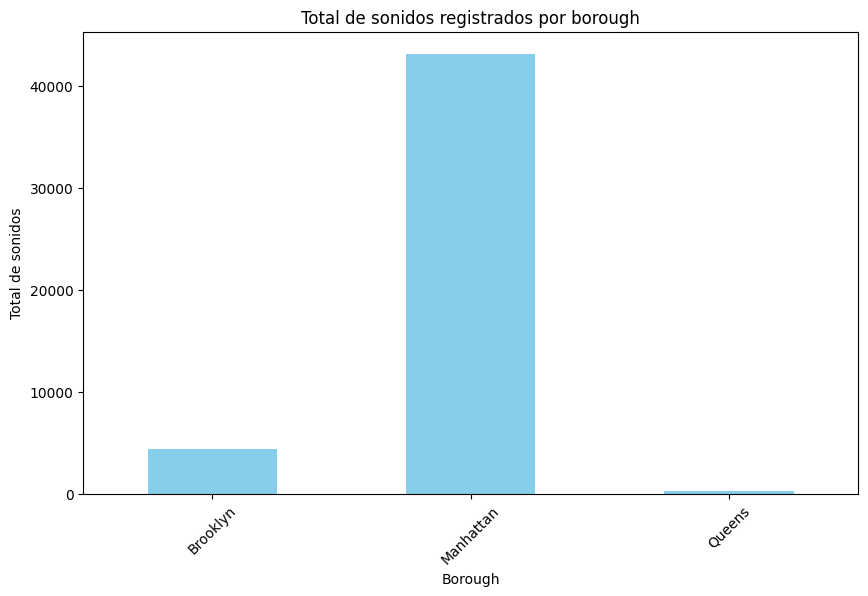

In [65]:
import matplotlib.pyplot as plt

# Agrupar por borough_name y sumar los sonidos
sounds_per_borough = df_nuevo.groupby('borough_name')['total_sounds'].sum()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sounds_per_borough.plot(kind='bar', color='skyblue')
plt.title('Total de sonidos registrados por borough')
plt.xlabel('Borough')
plt.ylabel('Total de sonidos')
plt.xticks(rotation=45)
plt.show()


In [71]:
# Contar la cantidad de registros por cada valor único en 'day_of_week'
conteo_dias = df_nuevo['day_of_week'].value_counts()

print(conteo_dias)

day_of_week
Thursday     9755
Wednesday    9640
Tuesday      9318
Monday       9264
Sunday       8566
Friday       8400
Saturday     7079
Name: count, dtype: int64


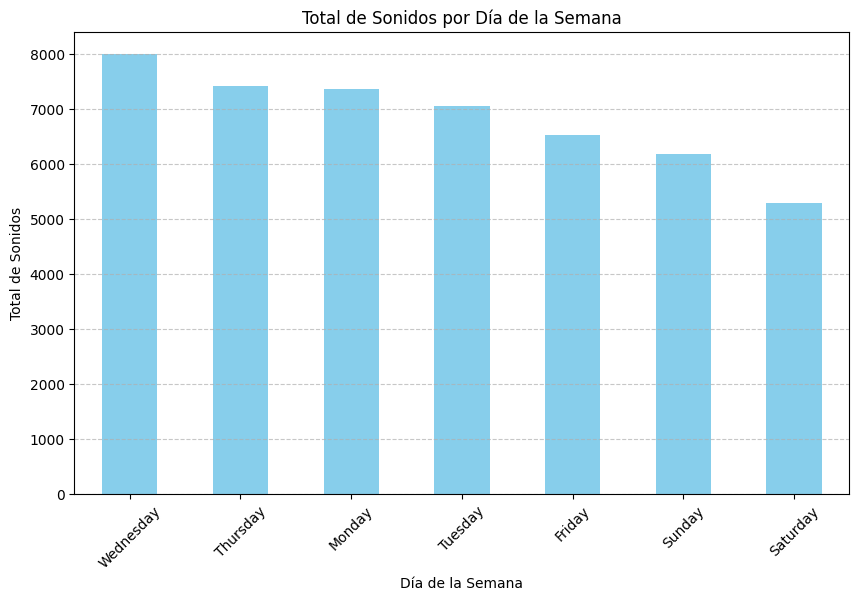

In [70]:
# Agrupar por 'day_of_week' y sumar los 'total_sounds' para cada día
sonidos_por_dia = df_nuevo.groupby('day_of_week')['total_sounds'].sum()

# Ordenar los días en función de la cantidad total de sonidos de mayor a menor
sonidos_por_dia = sonidos_por_dia.sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sonidos_por_dia.plot(kind='bar', color='skyblue')
plt.title('Total de Sonidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Sonidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [72]:
# Contar la cantidad de registros por cada valor único en 'hour'
conteo_horas = df_nuevo['hour'].value_counts()

print(conteo_horas)

hour
9     4061
11    3916
13    3907
8     3805
14    3779
10    3776
12    3730
15    3248
16    3029
20    2857
18    2855
7     2853
17    2850
19    2630
21    2069
22    1874
23    1669
0     1521
6     1344
1     1290
2     1267
5     1254
4     1240
3     1198
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7372\974746603.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['franja_horaria'] = df_nuevo['hour'].apply(clasificar_franja_horaria)


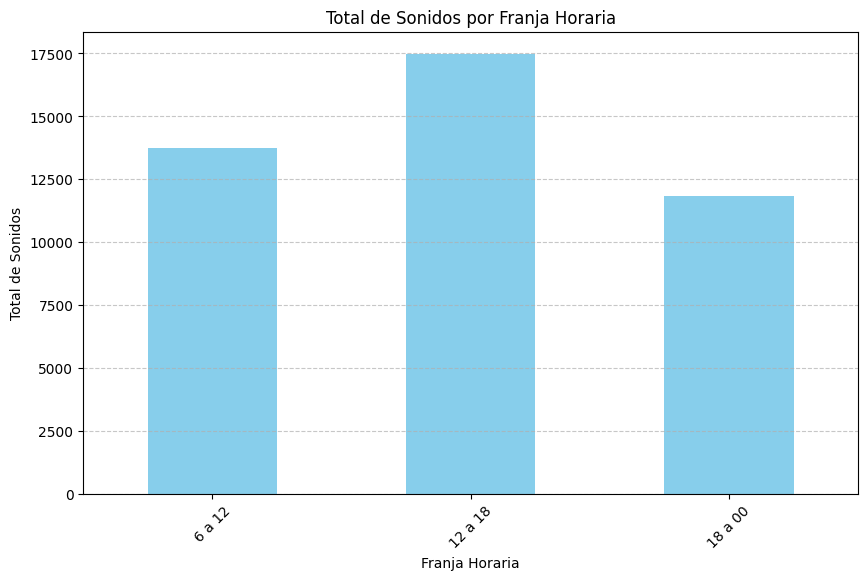

In [74]:
# Definir una función para clasificar las horas en franjas horarias
def clasificar_franja_horaria(hora):
    if 6 <= hora < 12:
        return '6 a 12'
    elif 12 <= hora < 18:
        return '12 a 18'
    elif 18 <= hora < 24:
        return '18 a 00'
    else:
        return 'Fuera de rango'  # En caso de horas fuera de rango, como 0 a 6

# Aplicar la función a la columna 'hour' para crear una nueva columna 'franja_horaria'
df_nuevo['franja_horaria'] = df_nuevo['hour'].apply(clasificar_franja_horaria)

# Agrupar por 'franja_horaria' y sumar la cantidad de sonidos
sonidos_por_franja = df_nuevo.groupby('franja_horaria')['total_sounds'].sum()

# Ordenar franjas horarias para el gráfico
orden_franjas = ['6 a 12', '12 a 18', '18 a 00']
sonidos_por_franja = sonidos_por_franja.reindex(orden_franjas)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sonidos_por_franja.plot(kind='bar', color='skyblue')
plt.title('Total de Sonidos por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Total de Sonidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()